<a href="https://colab.research.google.com/github/elemnurguner/data-ai-projects/blob/main/%F0%9F%93%8A_Mobil_Uygulama_Kullan%C4%B1c%C4%B1_Davran%C4%B1%C5%9F%C4%B1_Segmentasyonu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

üöÄ Proje Adƒ±mlarƒ±
Sim√ºlasyon veri seti olu≈üturma

Veriyi √∂n i≈üleme

PCA ile boyut indirgeme (g√∂rselle≈ütirme i√ßin)

K-Means ile segmentasyon

Segmentleri analiz etme

(ƒ∞steƒüe baƒülƒ±) Google Sheets veya Data Studio'ya aktarma

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

sns.set(style="whitegrid")


‚úÖ 2. √ñrnek Veri Seti Olu≈ütur


In [2]:
np.random.seed(42)

n = 300  # kullanƒ±cƒ± sayƒ±sƒ±

data = {
    "sessions": np.random.poisson(10, n),              # oturum sayƒ±sƒ±
    "time_spent": np.random.gamma(5, 10, n),            # dakikada ge√ßirilen s√ºre
    "purchases": np.random.binomial(1, 0.3, n),         # satƒ±n alma (1: yaptƒ±, 0: yapmadƒ±)
    "device_type": np.random.choice([0, 1], n),         # 0: Android, 1: iOS
}

df = pd.DataFrame(data)
df.head()


sessions  time_spent  purchases  device_type
0        12   41.853568          0            1
1         6   63.379977          0            0
2        11   41.095678          0            1
3        14  127.253219          1            0
4         7   47.957656          0            1

‚úÖ 3. Veriyi √ñl√ßekle (StandardScaler)



In [3]:
X = df.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


‚úÖ 4. PCA ile Boyut ƒ∞ndirgeme (2 boyuta indir)



In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])


‚úÖ 5. K-Means ile Segmentasyon (√∂rnek: 3 segment)



In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["segment"] = kmeans.fit_predict(X_scaled)
df_pca["segment"] = df["segment"]


‚úÖ 6. Segment G√∂rselle≈ütirme


In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="segment", palette="Set2", s=80)
plt.title("Kullanƒ±cƒ± Segmentleri (PCA + KMeans)")
plt.show()


‚úÖ 7. Segmentleri Tanƒ±mla

In [8]:
segment_summary = df.groupby("segment").mean()
segment_summary


sessions  time_spent  purchases  device_type
segment                                               
0        10.990099   42.178363   0.247525      0.00000
1         9.257576   44.886209   0.257576      1.00000
2         8.462687   83.717284   0.343284      0.38806

 1. DBSCAN ile Segmentasyon
DBSCAN (Density-Based Spatial Clustering of Applications with Noise), yoƒüunluk temelli segmentasyon yapar. Avantajƒ±:

Otomatik olarak ‚Äúg√ºr√ºlt√º verileri‚Äù (noise/outliers) ayƒ±rƒ±r.

K√ºme sayƒ±sƒ±nƒ± √∂nceden vermeye gerek yoktur.

In [9]:
from sklearn.cluster import DBSCAN


üß™ DBSCAN Uygulamasƒ±:



In [10]:
# DBSCAN parametreleri
dbscan = DBSCAN(eps=1.3, min_samples=10)
db_labels = dbscan.fit_predict(X_scaled)

# Segment s√ºtunu olarak ekle
df["dbscan_segment"] = db_labels
df_pca["dbscan_segment"] = db_labels


üéØ DBSCAN K√ºme G√∂rselle≈ütirme (PCA ile)


In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="dbscan_segment", palette="tab10", s=80)
plt.title("DBSCAN ile Yoƒüunluk Temelli Segmentasyon")
plt.show()


üìä Segment Analizi (DBSCAN)


In [12]:
df.groupby("dbscan_segment").mean()


sessions  time_spent  purchases  device_type   segment
dbscan_segment                                                         
-1              12.714286   94.228525   0.714286     0.571429  1.857143
 0               9.095652   51.455038   0.000000     1.000000  1.147826
 1              10.207921   50.838091   0.000000     0.000000  0.495050
 2               9.512821   52.129991   1.000000     1.000000  1.153846
 3               9.526316   53.931748   1.000000     0.000000  0.684211

‚úÖ 2. Dashboard Tarzƒ± √ñzet G√∂rselle≈ütirme
üß© Hedef: Her segment i√ßin ortalama davranƒ±≈ülarƒ± ‚Äúdashboard‚Äù gibi √∂zetle

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


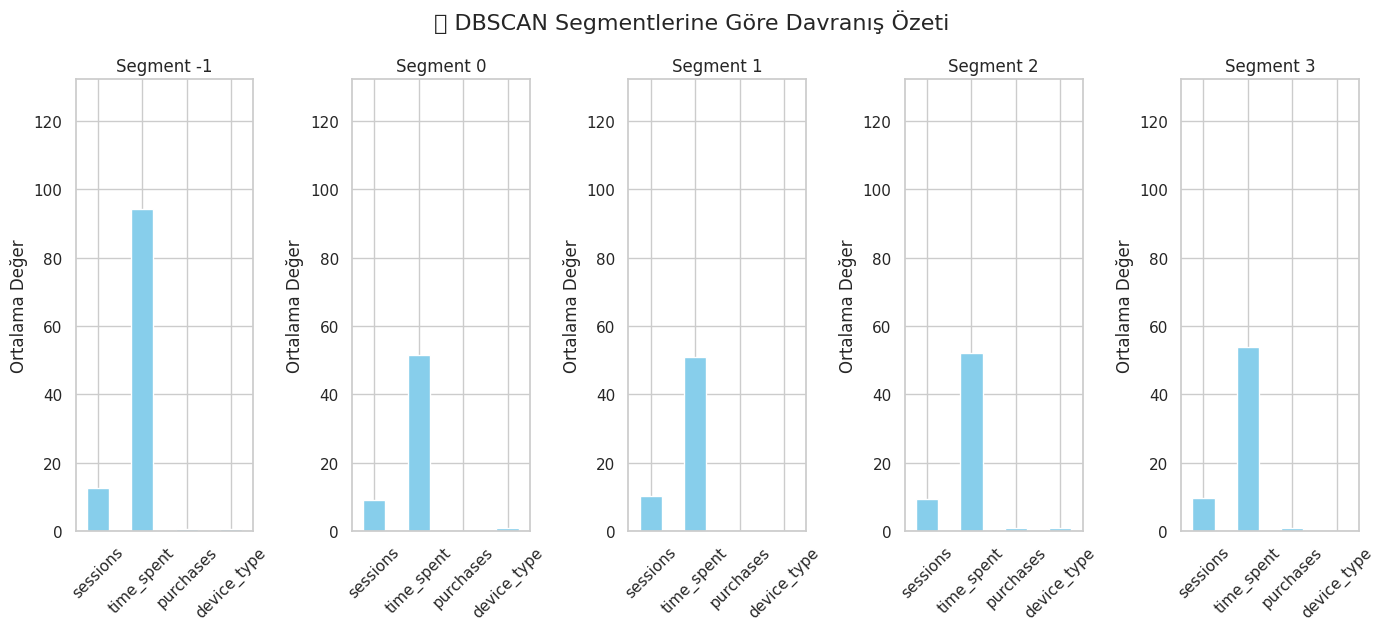

In [13]:
import matplotlib.gridspec as gridspec

segments = df["dbscan_segment"].unique()

plt.figure(figsize=(14, 6))
gs = gridspec.GridSpec(1, len(segments))

for idx, seg in enumerate(sorted(segments)):
    ax = plt.subplot(gs[0, idx])
    segment_data = df[df["dbscan_segment"] == seg][["sessions", "time_spent", "purchases", "device_type"]].mean()
    segment_data.plot(kind="bar", ax=ax, color='skyblue')
    ax.set_title(f"Segment {seg}")
    ax.set_ylim(0, max(df[["sessions", "time_spent"]].max())+5)
    ax.set_ylabel("Ortalama Deƒüer")
    ax.set_xticklabels(segment_data.index, rotation=45)

plt.tight_layout()
plt.suptitle("üìä DBSCAN Segmentlerine G√∂re Davranƒ±≈ü √ñzeti", fontsize=16, y=1.05)
plt.show()


üéÅ Sonu√ß
DBSCAN ile aykƒ±rƒ± kullanƒ±cƒ±lar tespit edildi.

Segmentlere g√∂re "ortalama davranƒ±≈ü profili" dashboard gibi √ßizildi.

Her bir kullanƒ±cƒ± grubunu (√∂rneƒüin ‚Äúpremium aday‚Äù, ‚Äúsadece gezen‚Äù, ‚Äúbot gibi davranan‚Äù) kolayca ayƒ±rt edebiliriz.